# 기후학 3-4주차 과제
---

### 마우나로아(Mauna Loa)에서 측정된 월평균 이산화탄소 농도 분석 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. PreProcessing
---


### 먼저 데이터를 불러옵니다.  
### 여기서 columns를 불러오는데 [Nonamed:]로 불러와지기 때문에 columns를 직접 지정해주었습니다. 

In [7]:
co2 = pd.read_csv("co2_mm_mlo.csv", encoding = "cp949", engine = 'python')
co2.columns = ["year","date","decimal","average","interpolate","trend","days"]

In [8]:
co2 = co2.iloc[72:,:]
co2.reset_index(drop = True, inplace = True)

In [9]:
co2 = co2.apply(pd.to_numeric)

In [10]:
co2['year'] = pd.to_datetime(co2['year'], format='%Y', errors='raise').dt.year
co2["date"] = pd.to_datetime(co2['date'], format='%m', errors='raise').dt.month

In [11]:
year = co2['year'].unique()
print(len(year), type(year))

61 <class 'numpy.ndarray'>


In [12]:
avg = []
for i in range(len(year)):
    a = np.mean(co2.iloc[12 * i:12 * (i+1), :]) 
    avg.append(a["interpolate"])

In [13]:
peryear = {}
for i in range(len(year)):
    peryear[str(year[i])] = avg[i]
peryear = pd.Series(peryear)

In [14]:
co2.loc[:,"average":].describe()

,average,interpolate,trend,days
count,722.000000,722.000000,722.000000,722.000000
mean,353.186496,356.150402,356.148795,19.150970
std,47.049144,28.031156,27.972142,11.874899
min,-99.990000,313.830000,316.470000,-1.000000
25%,330.715000,330.765000,330.580000,12.250000
50%,353.705000,353.705000,353.775000,25.000000
75%,378.822500,378.822500,378.777500,28.000000
max,414.660000,414.660000,413.250000,31.000000


### average 행에서 값들이 일부 -99로 관측되어있어 이를 내삽한 interpolate 행과 trend 행을 사용하였습니다.

# 2. Plotting
---


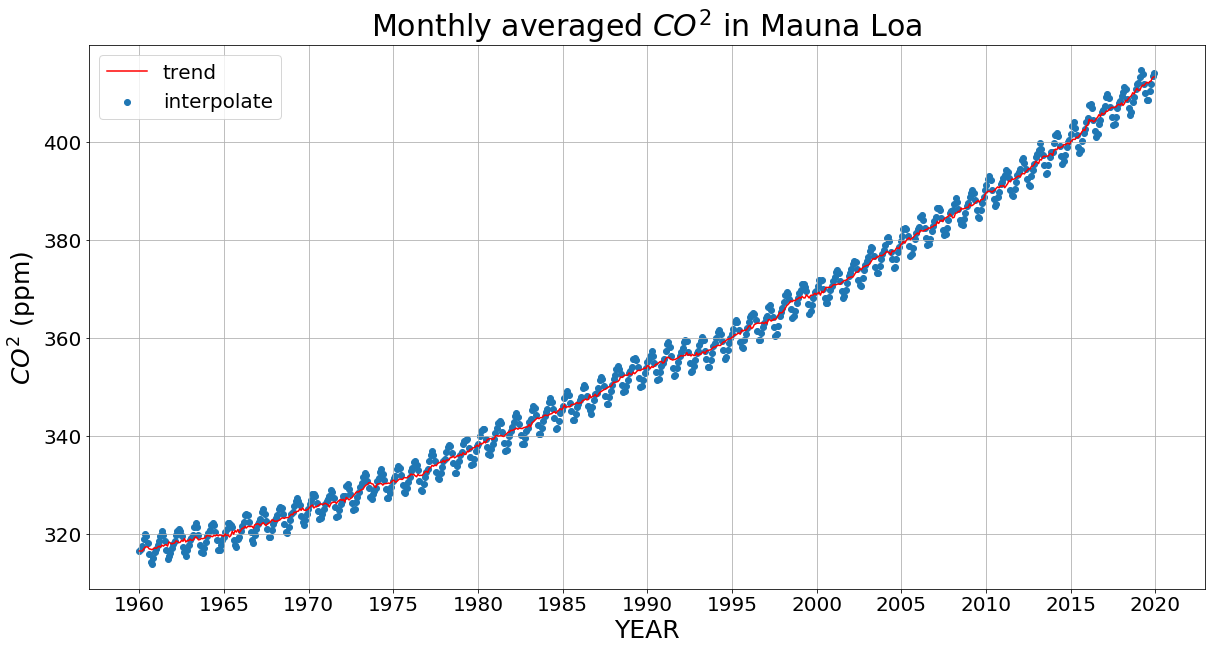

In [15]:
plt.figure(figsize = (20, 10))
plt.scatter(x = co2.index, y = co2["interpolate"], label = "interpolate")
plt.plot(co2["trend"], label = "trend", c = 'r')

plt.title("Monthly averaged ${CO^2}$ in Mauna Loa", fontsize = 30)
plt.xlabel("YEAR", fontsize = 25)
plt.ylabel("${CO^2}$ (ppm)", fontsize = 25)
plt.xticks(np.linspace(0, len(co2), 13),np.linspace(1960, 2020, 13, dtype = "int"),fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(loc = 'best', fontsize = 20)
plt.grid(True)

plt.savefig("Monthly CO2.png", bbox_inches = 'tight')

# 3. PPM / YEAR 단위로 농도 증가율 구하기
---

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = np.arange(61)
y = peryear.values

print("X.shape_:", X.shape)
print("y.shape_:", y.shape)

X.shape_: (61,)
y.shape_: (61,)


In [18]:
X = X.reshape(1,-1)

In [19]:
lr = LinearRegression().fit(X.T, y)

In [20]:
print("lr.coef_:",lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [1.60855085]
lr.intercept_: 308.68082407897055


### 선형회귀모델을 사용하여 농도 증가율을 계산하였을 때 약 1.61의 증가율을 보였습니다.

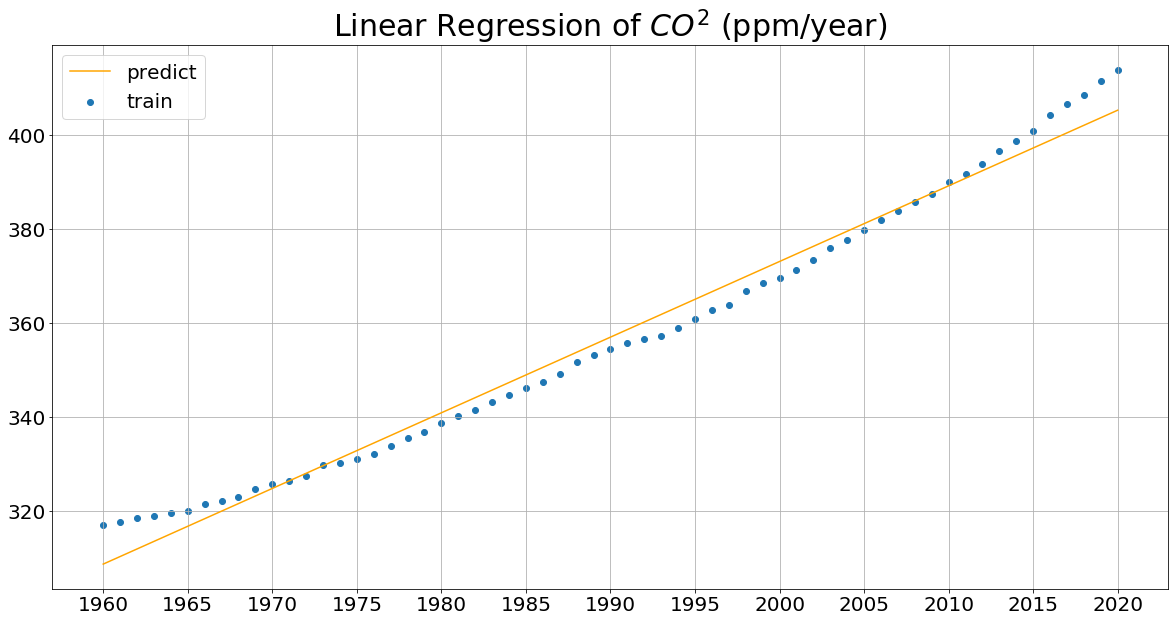

In [21]:
Y = np.arange(61) * lr.coef_ + lr.intercept_

plt.figure(figsize = (20,10))
plt.scatter(x = peryear.index, y = peryear.values, label = 'train')
plt.plot(Y, c = 'orange', label = 'predict')

plt.title("Linear Regression of ${CO^2}$ (ppm/year)", fontsize = 30)
plt.xticks(np.arange(0,61,5), fontsize = 20);
plt.yticks(fontsize = 20);

plt.grid(True)
plt.legend(loc = 'best', fontsize = 20);
plt.savefig("CO2 Linear Reg", bbox_inches = 'tight')

# 4. 계절변화의 원인을 설명하고, 그 원인을 분석하시오
---

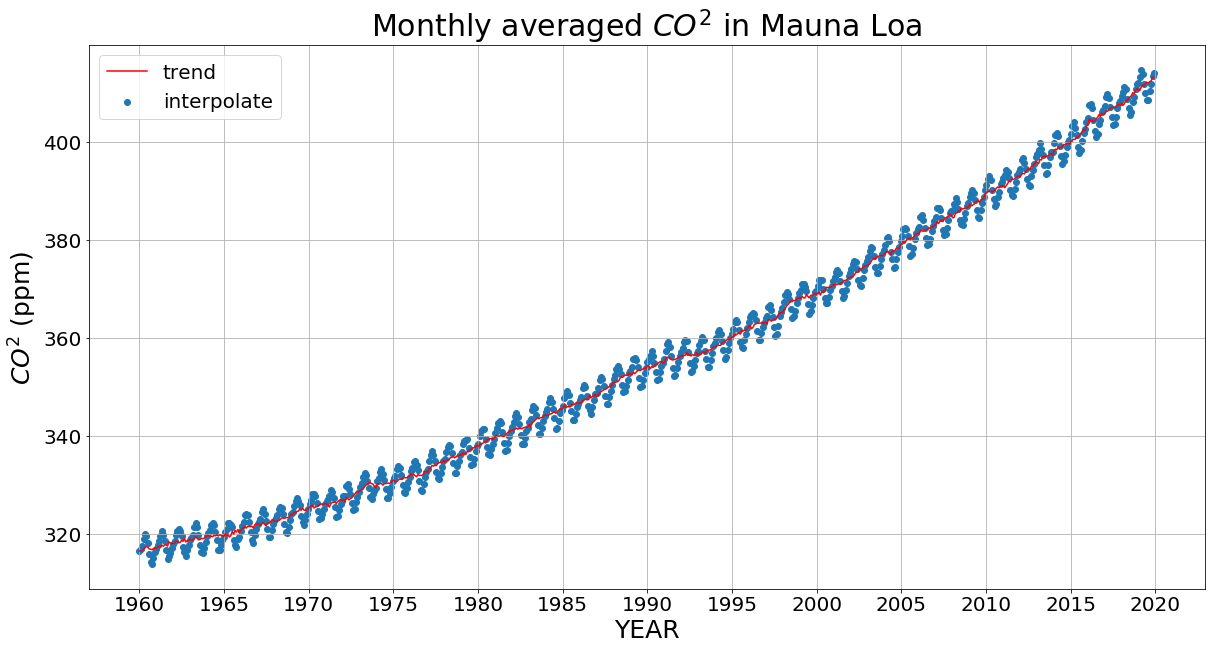

In [22]:
import PIL.Image as pilimg

a = pilimg.open('Monthly CO2.png')
a